In [61]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [62]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.5337,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.81560,1.746400
1,-0.098505,-0.17857,2.062800,2.9216,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.77291,0.641450
2,-0.169460,0.50153,2.470900,3.0650,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.43280,1.876800
3,-0.136050,0.47279,0.588090,1.9563,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.61825,3.265800
4,0.098830,0.23418,0.429700,1.6312,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.02690,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,-2.68670,1.576000,NaN,0.070769,NaN,0.80304,3.22290,NaN,NaN,NaN,0.005387
796,3.466600,-4.03460,3.100400,1.3461,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.46170,1.226700
797,3.344800,-2.38430,2.031000,2.2646,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.62250,1.585300
798,3.441400,-5.21630,1.577000,1.8440,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.88450,1.143700


In [63]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	40
float64		column 2	117
float64		column 3	53
float64		column 4	39
float64		column 5	65
float64		column 6	79
float64		column 7	118
float64		column 8	65
float64		column 9	105
float64		column 10	104
float64		column 11	130
float64		column 12	27


In [64]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,760.000000,683.000000,747.000000,761.000000,735.000000,721.000000,682.000000,735.000000,695.000000,696.000000,670.000000,773.000000
mean,1.505426,1.278399,1.966491,1.937102,2.016365,2.005969,1.933329,2.007472,2.017517,1.982735,1.976591,1.958131
std,2.738709,3.627230,1.145312,1.162081,1.169394,1.144254,1.166960,1.135494,1.134221,1.153013,1.180643,1.127680
min,-4.692600,-6.952900,0.020547,0.002628,0.022079,0.001674,0.021201,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.397890,-0.639345,1.019000,0.929840,1.000655,0.988890,0.924135,0.991740,1.086850,1.003828,0.921130,0.981610
50%,0.791475,0.745960,1.960500,1.887800,2.062000,1.996500,1.901700,2.007400,2.017200,2.006800,1.981850,1.939100
75%,3.975200,4.474900,2.906800,2.938100,3.016300,3.034500,2.964150,2.957600,3.007400,2.970050,3.042725,2.868300
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.997800,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

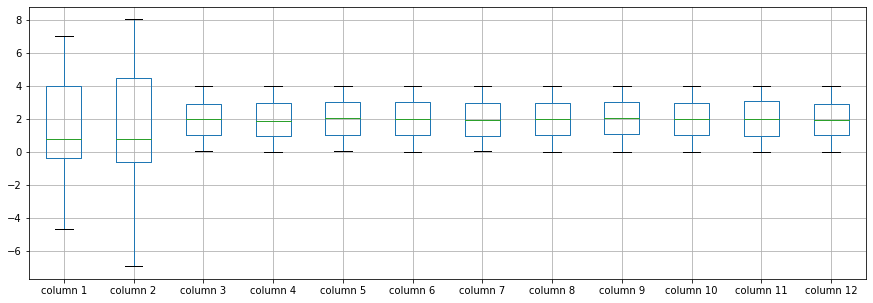

In [65]:
df.boxplot(return_type='axes', figsize=(15,5))

In [66]:
df.mean()

column 1     1.505426
column 2     1.278399
column 3     1.966491
column 4     1.937102
column 5     2.016365
column 6     2.005969
column 7     1.933329
column 8     2.007472
column 9     2.017517
column 10    1.982735
column 11    1.976591
column 12    1.958131
dtype: float64

In [67]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.415401,-0.022612,-0.001582,0.037669,0.033827,-0.005587,0.033531,0.015920,0.034541,0.015059,0.025010
column 2,-0.415401,1.000000,-0.002949,-0.028673,-0.003039,0.003263,0.042278,-0.012147,-0.008192,-0.070518,-0.056278,0.025809
column 3,-0.022612,-0.002949,1.000000,-0.044988,0.096213,0.008739,0.031385,-0.010008,0.017776,-0.032450,-0.022290,-0.009849
column 4,-0.001582,-0.028673,-0.044988,1.000000,0.000163,-0.027104,0.028685,0.066807,-0.010779,0.058232,0.060134,-0.029836
column 5,0.037669,-0.003039,0.096213,0.000163,1.000000,0.041650,0.014657,0.005269,-0.027446,-0.012915,-0.012612,0.017362
column 6,0.033827,0.003263,0.008739,-0.027104,0.041650,1.000000,-0.076794,0.043385,0.019466,0.012156,-0.037858,-0.023126
column 7,-0.005587,0.042278,0.031385,0.028685,0.014657,-0.076794,1.000000,-0.026781,-0.030111,-0.034069,0.010230,0.006721
column 8,0.033531,-0.012147,-0.010008,0.066807,0.005269,0.043385,-0.026781,1.000000,-0.077837,-0.068284,0.001849,-0.050018
column 9,0.015920,-0.008192,0.017776,-0.010779,-0.027446,0.019466,-0.030111,-0.077837,1.000000,0.046652,0.003193,-0.043646
column 10,0.034541,-0.070518,-0.032450,0.058232,-0.012915,0.012156,-0.034069,-0.068284,0.046652,1.000000,-0.064633,0.074788


In [68]:
#column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
#df = pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AE_1.xlsx', header=None,names=column_names)


In [69]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [70]:
imputer = md.Midas(layer_structure = [12,12+70,12+70+70,12+70+70+70,12+70+70+70+70,12+70+70+70+70+70,12+70+70+70+70,12+70+70+70,12+70+70,12+70,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.639690170288088
Epoch: 1 , loss: 26.226810722351075
Epoch: 2 , loss: 22.719350929260255
Epoch: 3 , loss: 21.356685485839844
Epoch: 4 , loss: 20.734480247497558
Epoch: 5 , loss: 20.57144374847412
Epoch: 6 , loss: 20.168436813354493
Epoch: 7 , loss: 19.878880310058594
Epoch: 8 , loss: 19.652875442504882
Epoch: 9 , loss: 19.207962265014647
Epoch: 10 , loss: 19.43004207611084
Epoch: 11 , loss: 19.19454345703125
Epoch: 12 , loss: 18.770025615692138
Epoch: 13 , loss: 18.71751766204834
Epoch: 14 , loss: 18.601490154266358
Epoch: 15 , loss: 18.49475387573242
Epoch: 16 , loss: 18.389233074188233
Epoch: 17 , loss: 18.21940111160278
Epoch: 18 , loss: 18.25013349533081
Epoch: 19 , loss: 18.133130016326906
Epoch: 20 , loss: 17.80092359542847
Epoch: 21 , loss: 18.144382457733155
Epoch: 22 , loss: 17.87335147857666
Epoch: 23 , loss: 18.039254417419432
Epoch: 24 , loss: 17.743826332092286
Epoch: 25 , loss: 17.74347

In [71]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [72]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [73]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [74]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.547127,0.000000,0.0,1.099176,0.0,-0.359192,0.000000,0.0,-1.789937,0.356577,-1.529761,0.0
796,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
797,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
798,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [75]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [76]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [77]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

58.904318214281375

In [78]:
denominator=Frobenius_norm(complete_df)
denominator

248.22200824735242

In [79]:
NRMS=numerator/denominator
NRMS


0.23730497803234035

In [80]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [81]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.679080,3.434400,2.79240,2.776300,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.921600,0.424720,1.178500,1.680200,1.38880,3.216700,2.923600,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.065000,1.567600,1.482400,0.921600,2.64240,1.518700,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.956300,2.787000,2.595700,2.893300,1.53750,0.999420,3.659300,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.631200,3.554100,2.271100,0.374250,2.17860,1.314000,1.063200,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.221873,-2.686700,1.576000,1.655296,0.070769,1.715508,0.803040,3.22290,1.703363,1.682077,1.701339,0.005387
796,3.466600,-4.034600,3.100400,1.346100,1.377300,2.288700,0.396130,2.39610,2.463500,1.667500,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.537000,1.225600,0.74027,2.495400,1.343300,1.622500,1.585300
798,3.441400,-5.216300,1.577000,1.844000,1.098700,3.424300,0.810810,3.72700,1.187900,0.951120,1.884500,1.143700


In [82]:
imputations[-1].to_excel("4-gauss_AE_10(imp).xlsx", index=False, header=False)